**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***

# <font color = brown, size=6> Generating quadruple-precision $\mathcal{GDD}$ pdf values (PARI/GP)</font>

<font size=4> Computational tools - CAS: </font>  **<font size=4>PARI/GP</font>**  

## $\mathcal{GDD}$ pdf  $-$ analytic expression

$
f(z)=
\dfrac{\beta_{1}^{\alpha_{1}} \beta_{2}^{\alpha_{2}}}{\beta^{\alpha-1}}
\begin{cases}
{\dfrac{e^{z \beta_{2}}}{\Gamma\left(\alpha_{2}\right)} U\left(1-\alpha_{2}, 2-\alpha,-z \beta\right),} & {z<0} \\[12pt]
\begin{array}{cc} 
\frac{\Gamma(\alpha-1)}{\beta^{a / 2-1} \Gamma\left(\alpha_{1}\right) \Gamma\left(\alpha_{2}\right)}, & \scriptstyle 1<\alpha \\ 
\infty,  & \scriptstyle 0<\alpha \leq 1 
\end{array}, & z=0 \\[12pt] 
{\dfrac{e^{-z \beta_{1}}}{\Gamma\left(\alpha_{1}\right)} U\left(1-\alpha_{1}, 2-\alpha, z \beta\right),} & {z>0}
\end{cases}
$


$\alpha=\alpha_{1}+\alpha_{2}, \quad \beta=\beta_{1}+\beta_{2}$

## PARI/GP code

In [1]:
%%gp 

\p33        
\\ defining U and G
U(u,v,t) = hyperu(u,v,t);
G(s) = gamma(s);

[a1, b1, a2, b2] = [0.5, 1, 8.5, 93];
a = a1+a2; b = b1+b2;
c = b1^a1*b2^a2/b^(a-1);
cp = c/G(a1); cm = c/G(a2);

\\ defining f(z)
fm(z) = cm*exp( z*b2)*U(1-a2,2-a,-b*z);
f0(z) = if(a>1, c*G(a-1)/(G(a1)*G(a2)), oo);
fp(z) = cp*exp(-z*b1)*U(1-a1,2-a, b*z);

f(z) = if(z>0, fp(z), /*if*/ z<0, fm(z), /*else*/f0(z));

\\ generating function values
fvalues(n, dh, hh) = {flist = vector(n); for(i= 1, n, flist[i] = f(dh+(hh-dh)/(n-1)*(i-1))); flist};

## Sage procedures and functions

In [2]:
# python libraries
import numpy as np
from numpy import array as v
from io import StringIO
from time import time

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
# approximate formulas for precisions expressed in bits and decimal places
bits = lambda d:round((d+1)*ln(10)/ln(2)) 
dps = lambda b:round(b*ln(2)/ln(10) - 1)

In [4]:
bits(33), dps(113)

(113, 33)

In [14]:
# writing PARI pdf data in a file via print commnand
def write_pari(filename, n, dh, hh):
    f = open(filename,"w")
    data = gp("fvalues"+str((n,dh,hh)))
    datastring = str(data)[1:-1].replace(' ', '').replace('+oo','inf')
    print(datastring, file =f)
    f.close()

# reading PARI pdf data with quadruple precision
def read_pari(filename, delim = ',', dps = 33):
    RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
    f = open(filename, "r")
    datastring = f.read()
    f.close()
    return [RRf(item) for item in datastring.replace('\n','').split(delim)]    

# generating PARI pdf with quadruple precision
def paridata(n, dh, hh, dps = 33):
    RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
    data = gp("fvalues"+str((n,dh,hh)))
    datastring = str(data)[1:-1].replace(' ', '').replace('+oo','inf')
    return [RRf(item) for item in datastring.split(',')]

# writing x values with quadruple precision
def write_xdata(filename, n, dh, hh, dps = 33):
    f = open(filename,"w")
    RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
    data = [RRf(QQ(dh)+(QQ(hh)-QQ(dh))/(n-1)*(i-1)) for i in [1..n]]
    for item in data:
        print(item, file=f)
    f.close()

# Testing and examples

In [15]:
# writing x values (quadruple precision) 
for n in [1..5]:
    tic = time()   # start time
    
    filename = 'xvalues'+str(10^n)+'.txt'
    write_xdata(filename, 10^n,-3,4)
    
    toc = time()-tic; # end time
    print('10^'+str(n)+' x values: runtime =',toc,'s')

10^1 x values: runtime = 0.004057168960571289 s
10^2 x values: runtime = 0.0026879310607910156 s
10^3 x values: runtime = 0.009604692459106445 s
10^4 x values: runtime = 0.07961511611938477 s
10^5 x values: runtime = 1.487473487854004 s


In [16]:
# pre-calculated x values (quadruple precision) 
N = 5
dx = {str(10**(n+1)):np.loadtxt('xvalues'+str(10**(n+1))+'.txt', dtype=np.longdouble) for n in range(N)}

In [7]:
# writing 10^n pdf values in files
for n in [1..5]:
    tic = time()   # start time
    
    filename = 'Pari_Sage_pdf'+str(10^n)+'.txt'
    write_pari(filename, 10^n,-3,4)
    
    toc = time()-tic; # end time
    print('10^'+str(n)+' values: runtime =',toc,'s')

10^1 values: runtime = 0.09752464294433594 s
10^2 values: runtime = 0.10445594787597656 s
10^3 values: runtime = 0.6612610816955566 s
10^4 values: runtime = 6.309978008270264 s
10^5 values: runtime = 103.18397092819214 s


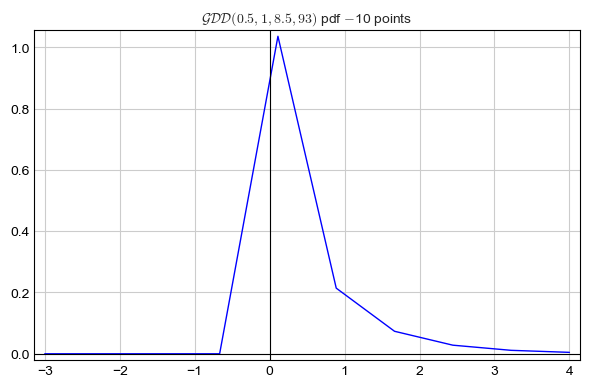

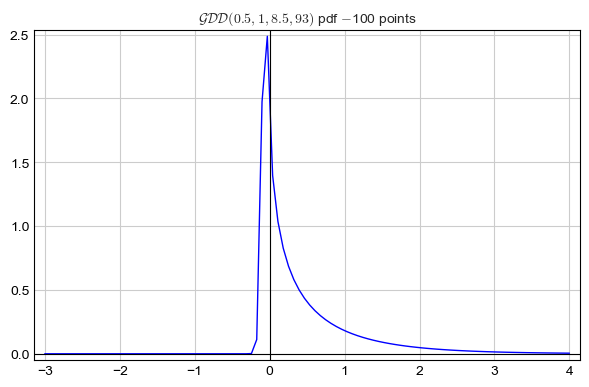

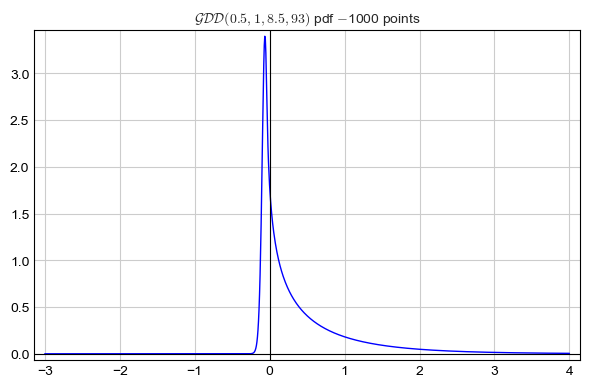

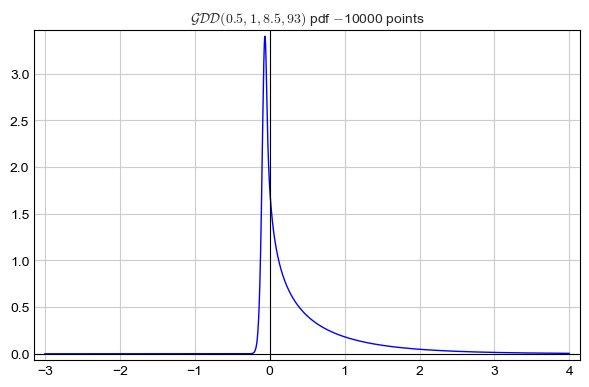

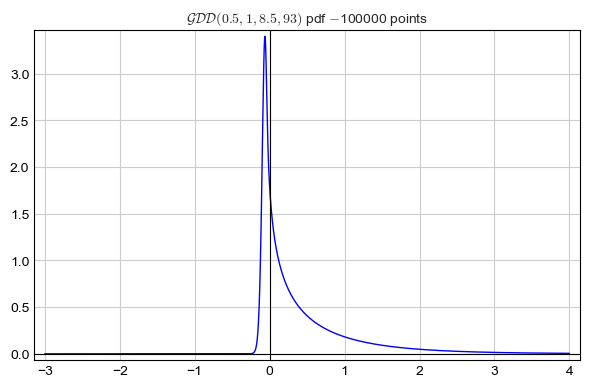

In [8]:
# plots
for n in [1..5]:
    filename = 'Pari_Sage_pdf'+str(10^n)+'.txt'
    data = read_pari(filename)
    g = line(zip(dx[str(10^n)],data))
    g.show(frame=True, title = '$\\mathcal{GDD}(0.5, 1, 8.5, 93)$ pdf $-$'+str(10^n)+' points')    

In [9]:
# generating 10 pdf values with PARIGP
n = 10
dh, hh = -3, 4 

tic = time()   # start time
data = gp("fvalues"+str((n,dh,hh)))
toc = time()-tic; # end time

toc

0.037807464599609375

In [10]:
str(data), str(data)[1:-1]

('[1.03379229100579436301035956503873 E-106, 2.83772520147389743227545047892751 E-76, 2.93861975549859010787040889281495 E-46, 2.39164467877898486680863608089048 E-17, 1.03565906114776625995773585388789, 0.214093530461984438632326515919271, 0.0734128746169376574027048696216277, 0.0280789597152010327239546782686182, 0.0112843517283459267561241047617803, 0.00466541758740093547697074990920987]',
 '1.03379229100579436301035956503873 E-106, 2.83772520147389743227545047892751 E-76, 2.93861975549859010787040889281495 E-46, 2.39164467877898486680863608089048 E-17, 1.03565906114776625995773585388789, 0.214093530461984438632326515919271, 0.0734128746169376574027048696216277, 0.0280789597152010327239546782686182, 0.0112843517283459267561241047617803, 0.00466541758740093547697074990920987')

In [11]:
# data conversion to one string
datastring = str(data)[1:-1].replace(' ', '').replace('+oo','inf')

# conversion to quadruple precision
RRf = RealField(113)
dparis = [RRf(item) for item in datastring.split(',')]
dparis

[1.03379229100579436301035956503873e-106,
 2.83772520147389743227545047892751e-76,
 2.93861975549859010787040889281495e-46,
 2.39164467877898486680863608089048e-17,
 1.03565906114776625995773585388789,
 0.214093530461984438632326515919271,
 0.0734128746169376574027048696216277,
 0.0280789597152010327239546782686182,
 0.0112843517283459267561241047617803,
 0.00466541758740093547697074990920987]

In [12]:
# read string via numpy loadtxt
dtxt = StringIO(datastring)
df = np.loadtxt(dtxt, delimiter=',', dtype = np.longdouble)
df

array([1.03379229e-106, 2.83772520e-076, 2.93861976e-046, 2.39164468e-017,
       1.03565906e+000, 2.14093530e-001, 7.34128746e-002, 2.80789597e-002,
       1.12843517e-002, 4.66541759e-003], dtype=float128)

In [13]:
# save as csv
np.savetxt('test_Pari_Sage_pdf_10.txt', df)

In [14]:
# read file via numpy loadtxt
data = np.loadtxt('test_Pari_Sage_CDF_10.txt', delimiter=',')

In [15]:
data

array([1.14213986e-108, 3.16533757e-078, 3.34437110e-048, 2.91509301e-019,
       4.73795343e-001, 8.38391253e-001, 9.39179908e-001, 9.75663897e-001,
       9.89950599e-001, 9.95768496e-001])

***
<a id=references></a>
# <font color=brown> References </font>
This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
Simulation and available at  <https://arxiv.org/abs/2105.04427>.
* Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

### Abstract of the paper

At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 


* The PARI Group. (2019a). PARI/GP version 2.11.1. http://pari.math.u-bordeaux.fr/
* The PARI Group. (2019b). User’s Guide to PARI / GP (version 2.11.1). Institut de Mathématiques de Bordeaux. https://pari.math.u-bordeaux.fr/pub/pari/manuals/2.11.1/users.pdf
